# Gradient Boosting: XGBoost

This is a sample tutorial on how to use the XGBoost library.

XGBoost can be installed as:

```bash
sudo pip install xgboost
```
XGBoost can be upgraded as:
```bash
sudo pip install --upgrade xgboost
```

The code in this notebook is based on the following book:

### XGBoost With Python by Jason Brownlee

https://machinelearningmastery.com/xgboost-with-python/

In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

We are going to user the Pima Indians dataset (from Lecture 6):

https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data

This dataset is comprised of 8 input variables that describe medical details of patients and one output variable to indicate whether the patient will have an onset of diabetes within 5 years.

In [2]:
filename = "../datasets/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# df stands for "Data Frame"
df = pd.read_csv(filename, names=names)

# Split the data into X and Y
array = df.values
X = array[:,0:8]
Y = array[:,8]

Split the data into a training and test set:

In [3]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

Train the XGBoost Model:

In [4]:
# fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

We can see the parameters used in a trained model by printing the model, for example:

In [5]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)


We can make predictions with the model:

In [6]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [7]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


In [8]:
print(y_pred)

[0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1.]


In [9]:
print(predictions)

[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,

## Data Preparation for Gradient Boosting

Internally, XGBoost models represent all problems as a regression predictive modeling problem
that only takes numerical values as input. If your data is in a different form, it must be prepared
into the expected format.

We are going to use the IRIS dataset: http://archive.ics.uci.edu/ml/datasets/Iris
This dataset has the class as a categorical feature. Since XGBoost expects numeric features, the dataset cannot be used as-is, its class must be converted into numbers.

In [10]:
filename = "../datasets/iris.data"
names = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class']
# df stands for "Data Frame"
df = pd.read_csv(filename, header=None, names=names)

# Split the data into X and Y
array = df.values
X = array[:,0:4]
Y = array[:,4]

# from sklearn import datasets
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features.
# Y = iris.target

In [11]:
print(Y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

Load the encoder:

In [12]:
from sklearn.preprocessing import LabelEncoder
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)

In [13]:
print(label_encoded_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Train the XGBoost Model:

In [14]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_y,
test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)


Make predictions and print the accuracy:

In [15]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.00%


### Notice
Notice how the XGBoost model is configured to automatically model the multiclass classification problem using the multi:softprob objective, a variation on the softmax loss function
to model class probabilities. This suggests that internally, that the output class is converted
into a one hot type encoding automatically.

In [16]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)


## Plot a Single XGBoost Decision Tree

In [17]:
from xgboost import XGBClassifier
from xgboost import plot_tree
from matplotlib import pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


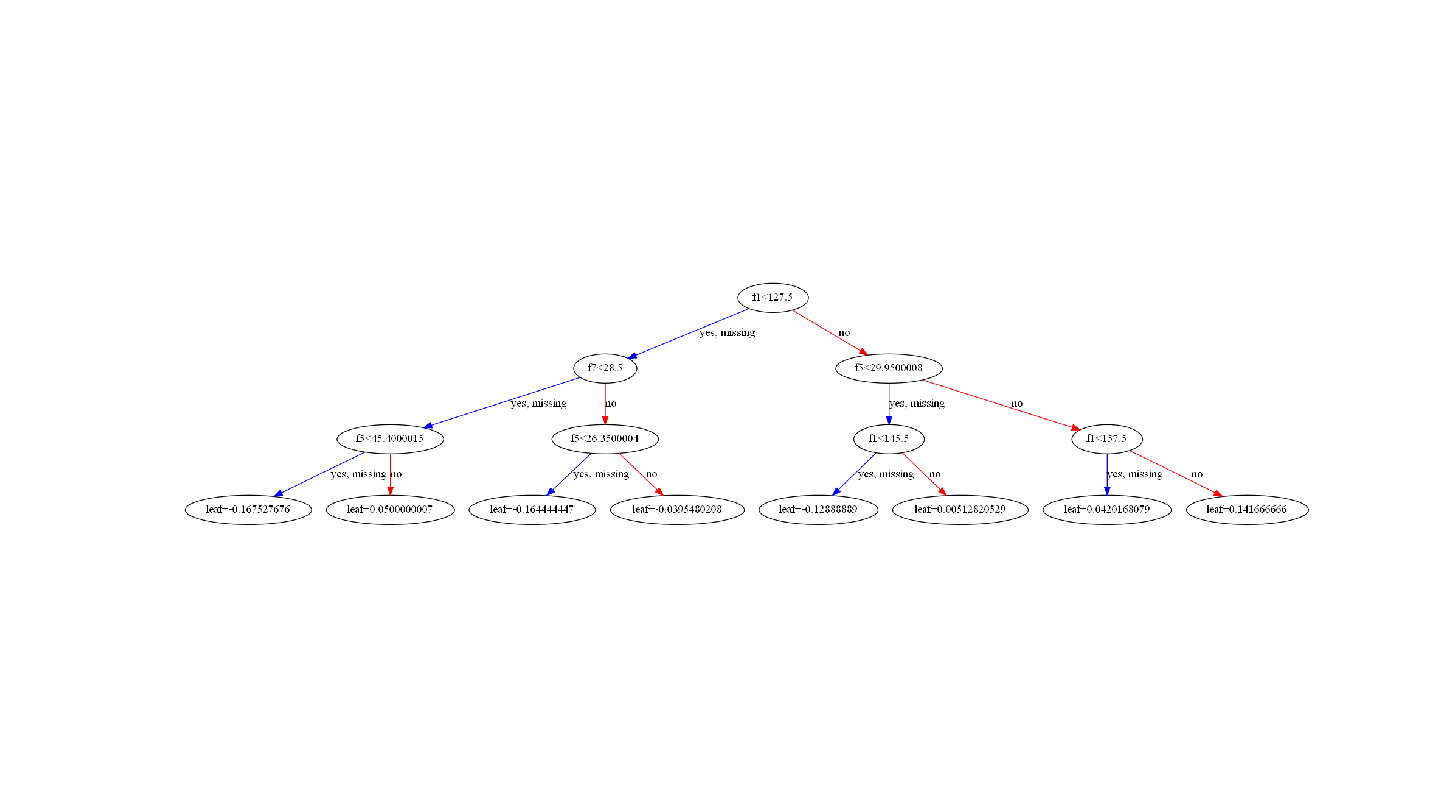

In [18]:
filename = "../datasets/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# df stands for "Data Frame"
df = pd.read_csv(filename, names=names)

# Split the data into X and Y
array = df.values
X = array[:,0:8]
Y = array[:,8]
# fit model no training data
model = XGBClassifier()
model.fit(X, Y)
# plot single tree
plot_tree(model)
plt.show()

Plot the $4^{th}$ tree:

<IPython.core.display.Javascript object>


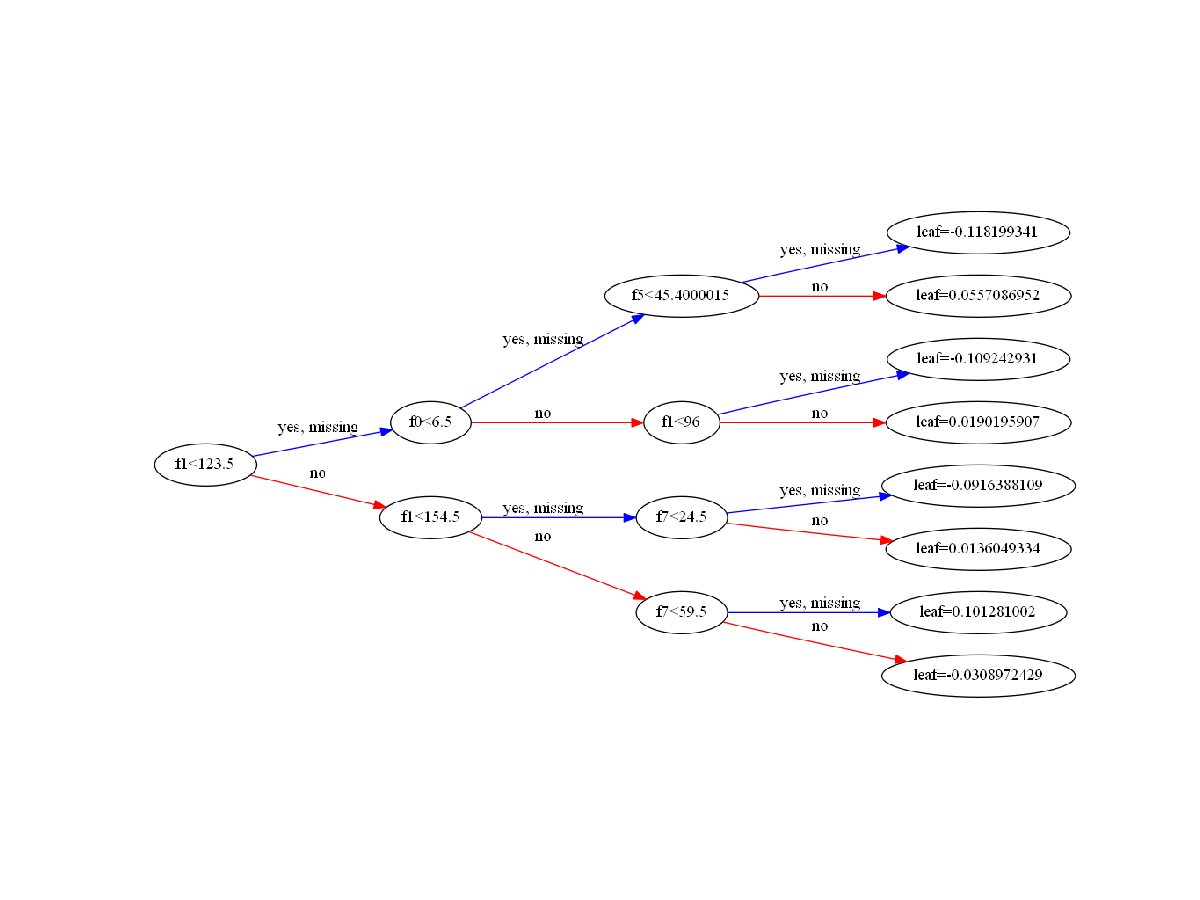

In [19]:
plot_tree(model, num_trees=3, rankdir='LR')
plt.show()

### Feature importance

In [20]:
print(model.feature_importances_)

[0.08265495 0.34031582 0.05761176 0.08581445 0.07284074 0.14332853
 0.08399398 0.13343978]


<IPython.core.display.Javascript object>


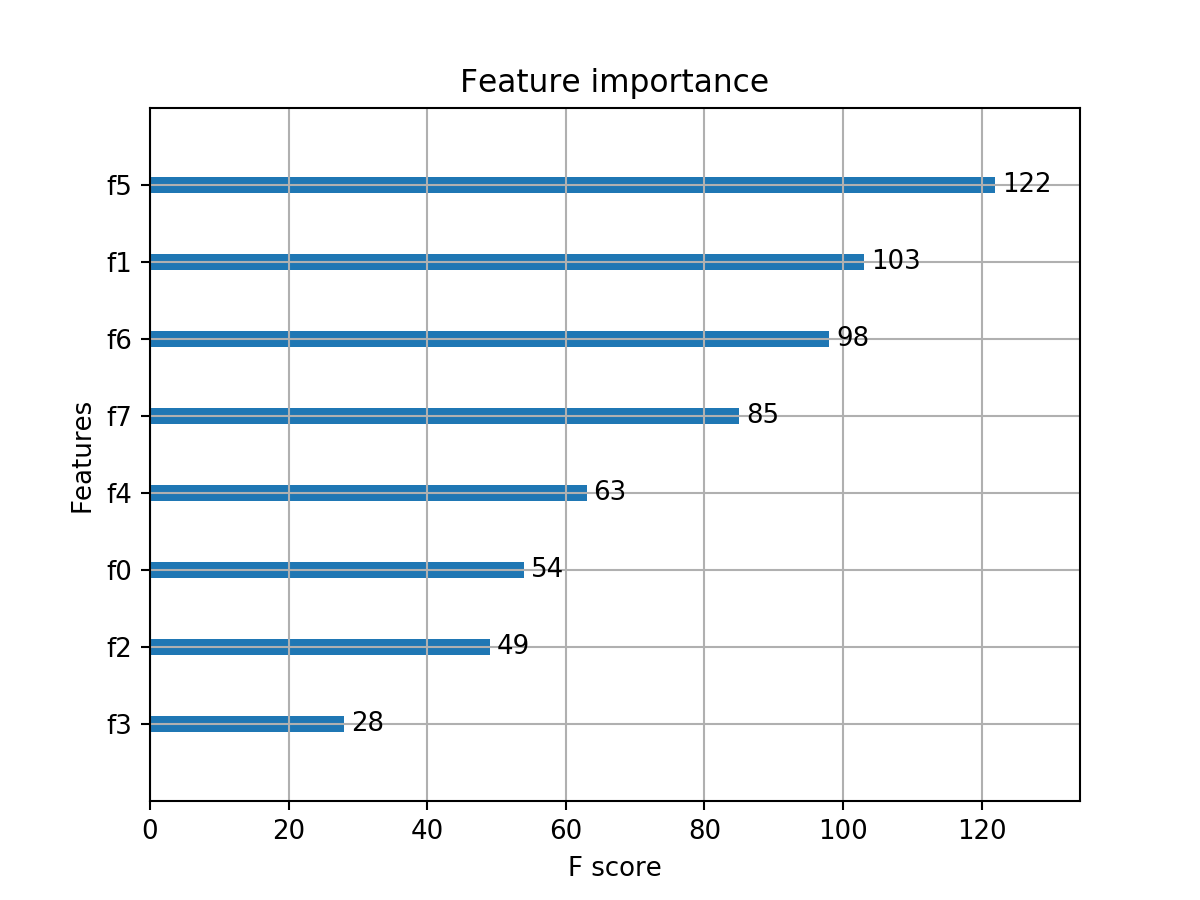

In [21]:
# plot
from xgboost import plot_importance
plot_importance(model)
plt.show()

### Notice

It is interesting to check the skit-learn class `SelectFromModel`.

In [22]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
  # select features using threshold
  selection = SelectFromModel(model, threshold=thresh, prefit=True)
  select_X_train = selection.transform(X_train)
  # train model
  selection_model = XGBClassifier()
  selection_model.fit(select_X_train, y_train)
  # eval model
  select_X_test = selection.transform(X_test)
  y_pred = selection_model.predict(select_X_test)
  predictions = [round(value) for value in y_pred]
  accuracy = accuracy_score(y_test, predictions)
  print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1],accuracy*100.0))

Thresh=0.078, n=8, Accuracy: 77.95%
Thresh=0.080, n=7, Accuracy: 76.38%
Thresh=0.085, n=6, Accuracy: 77.56%
Thresh=0.095, n=5, Accuracy: 76.38%
Thresh=0.102, n=4, Accuracy: 76.38%
Thresh=0.109, n=3, Accuracy: 74.80%
Thresh=0.160, n=2, Accuracy: 75.98%
Thresh=0.292, n=1, Accuracy: 70.08%


## Monitoring Training Performance

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.259843
[1]	validation_0-error:0.26378
[2]	validation_0-error:0.26378
[3]	validation_0-error:0.255906
[4]	validation_0-error:0.255906
[5]	validation_0-error:0.26378
[6]	validation_0-error:0.23622
[7]	validation_0-error:0.255906
[8]	validation_0-error:0.248031
[9]	validation_0-error:0.248031
[10]	validation_0-error:0.248031
[11]	validation_0-error:0.232283
[12]	validation_0-error:0.228346
[13]	validation_0-error:0.228346
[14]	validation_0-error:0.228346
[15]	validation_0-error:0.228346
[16]	validation_0-error:0.228346
[17]	validation_0-error:0.228346
[18]	validation_0-error:0.224409
[19]	validation_0-error:0.232283
[20]	validation_0-error:0.232283
[21]	validation_0-error:0.23622
[22]	validation_0-error:0.23622
[23]	validation_0-error:0.232283
[24]	validation_0-error:0.228346
[25]	validation_0-error:0.228346
[26]	validation_0-error:0.224409
[27]	validation_0-error:0.224409
[28]	validation_0-error:0.228346
[29]	validation_0-error:0.232283
[30]	validation_0-error:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

XGBoost supports a suite of evaluation metrics not limited to:
 * rmse for root mean squared error.
 * mae for mean absolute error.
 * logloss for binary logarithmic loss and mlogloss for multiclass log loss (cross entropy).
 * error for classification error.
 * auc for area under ROC curve.

### Learning curves

In [24]:
results = model.evals_result()
print(results)

{'validation_0': {'error': [0.259843, 0.26378, 0.26378, 0.255906, 0.255906, 0.26378, 0.23622, 0.255906, 0.248031, 0.248031, 0.248031, 0.232283, 0.228346, 0.228346, 0.228346, 0.228346, 0.228346, 0.228346, 0.224409, 0.232283, 0.232283, 0.23622, 0.23622, 0.232283, 0.228346, 0.228346, 0.224409, 0.224409, 0.228346, 0.232283, 0.228346, 0.224409, 0.224409, 0.228346, 0.228346, 0.224409, 0.228346, 0.224409, 0.216535, 0.220472, 0.216535, 0.216535, 0.216535, 0.216535, 0.212598, 0.224409, 0.224409, 0.220472, 0.224409, 0.232283, 0.228346, 0.224409, 0.224409, 0.232283, 0.228346, 0.228346, 0.224409, 0.224409, 0.224409, 0.224409, 0.224409, 0.224409, 0.224409, 0.224409, 0.224409, 0.224409, 0.220472, 0.216535, 0.216535, 0.216535, 0.216535, 0.216535, 0.216535, 0.216535, 0.216535, 0.216535, 0.216535, 0.216535, 0.216535, 0.212598, 0.212598, 0.212598, 0.212598, 0.212598, 0.208661, 0.204724, 0.212598, 0.212598, 0.212598, 0.204724, 0.208661, 0.208661, 0.208661, 0.208661, 0.208661, 0.212598, 0.204724, 0.212598

Accuracy: 77.95%


<IPython.core.display.Javascript object>


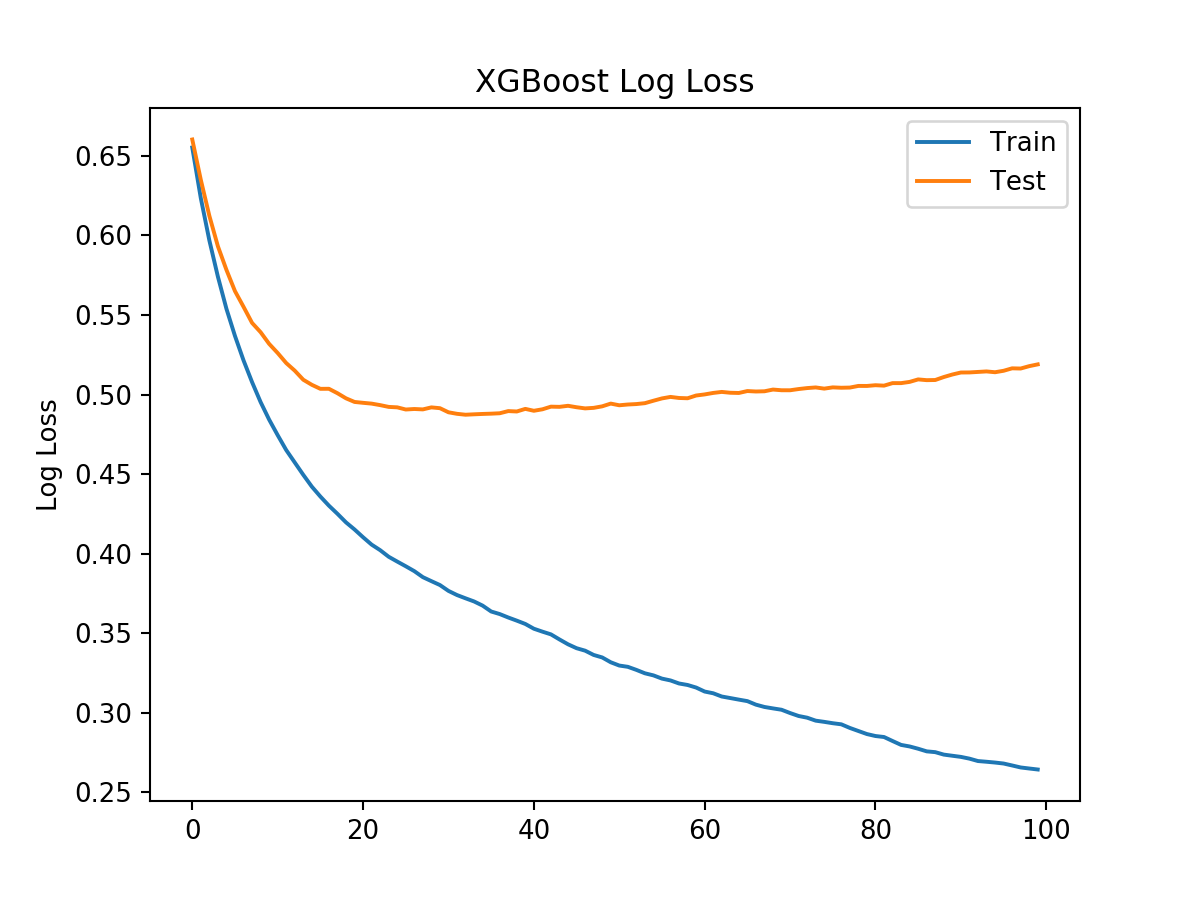

<IPython.core.display.Javascript object>


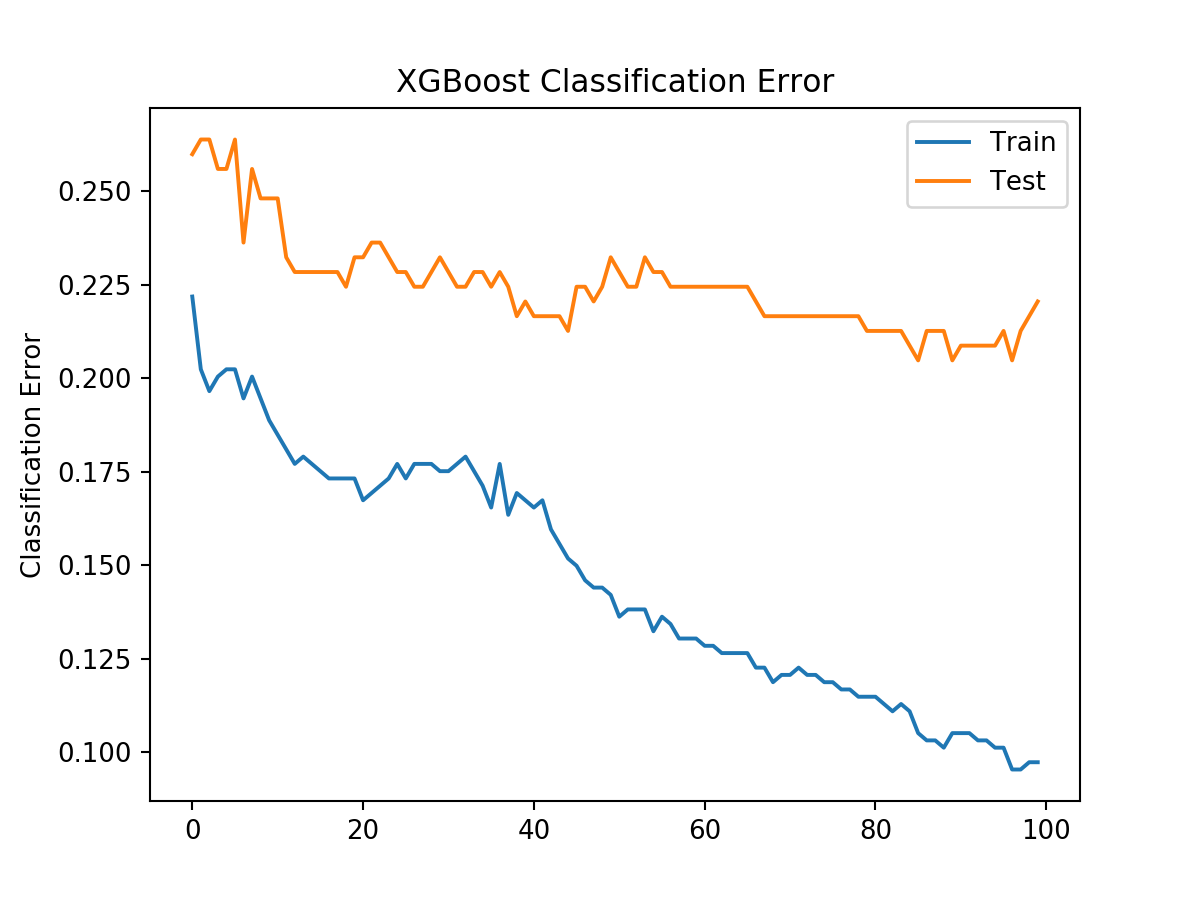

In [25]:
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

### Early stopping

[0]	validation_0-logloss:0.655153	validation_1-logloss:0.660186
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.623322	validation_1-logloss:0.634854
[2]	validation_0-logloss:0.596814	validation_1-logloss:0.61224
[3]	validation_0-logloss:0.574027	validation_1-logloss:0.593118
[4]	validation_0-logloss:0.553853	validation_1-logloss:0.578303
[5]	validation_0-logloss:0.536789	validation_1-logloss:0.564942
[6]	validation_0-logloss:0.521477	validation_1-logloss:0.555113
[7]	validation_0-logloss:0.507802	validation_1-logloss:0.54499
[8]	validation_0-logloss:0.495257	validation_1-logloss:0.539151
[9]	validation_0-logloss:0.484235	validation_1-logloss:0.531819
[10]	validation_0-logloss:0.474463	validation_1-logloss:0.526065
[11]	validation_0-logloss:0.465102	validation_1-logloss:0.519769
[12]	validation_0-logloss:0.457304	validation_1-logloss:0.514979
[1

<IPython.core.display.Javascript object>


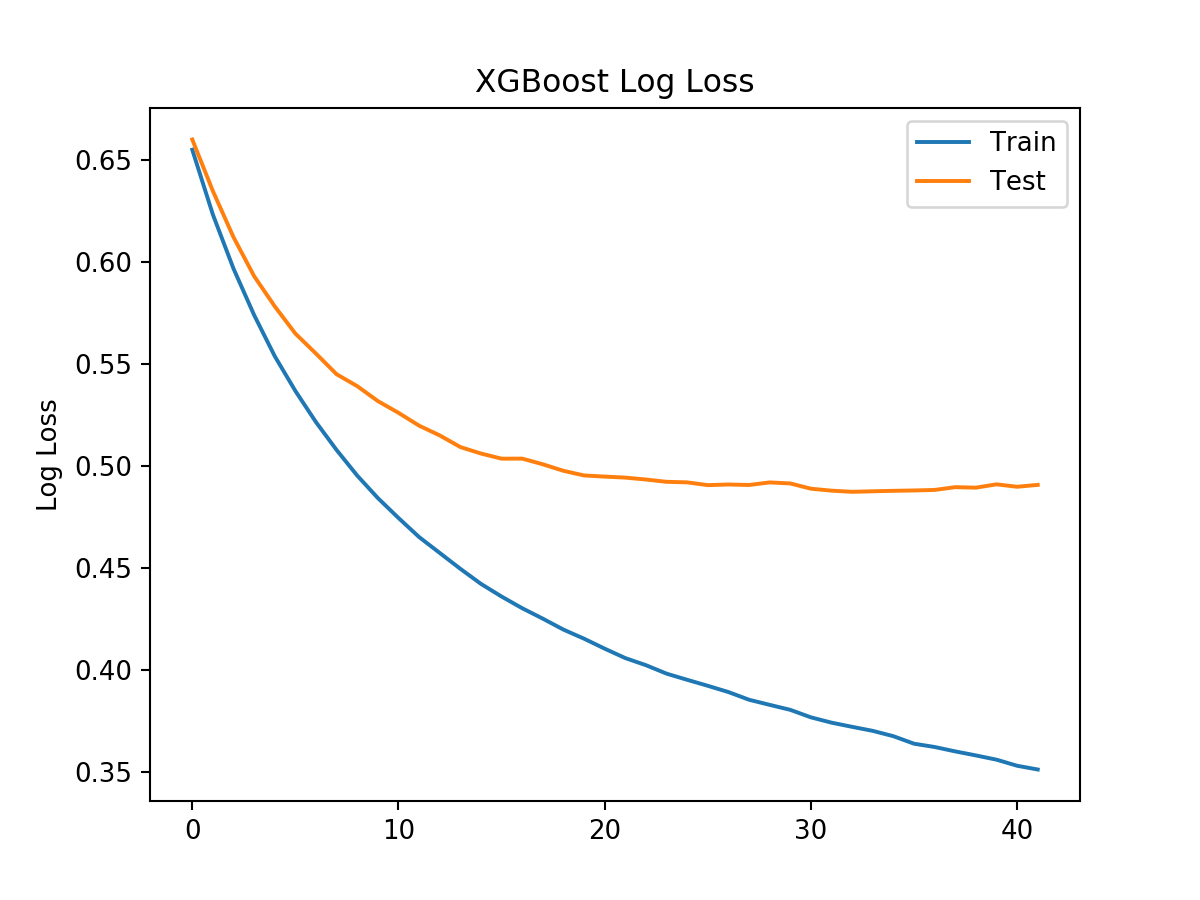

In [26]:
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["logloss"], eval_set=eval_set, verbose=True, early_stopping_rounds=10)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()